In [2]:
%clear

In [18]:
import numpy as np
import tensorflow as tf
import datetime
# this code is used to check whether my gradient calculation can be used
import os
import sys
BASE_DIR = os.getcwd()
from tensorflow import keras
import matplotlib.pyplot as plt

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense,Dropout,Conv2D,MaxPooling2D,Flatten
from tensorflow.keras.datasets import mnist
from tensorflow.keras.regularizers import l1
from tensorflow.keras.optimizers import Adam
from tensorflow import keras
import copy
import random
import cv2

print('current working dirctory = ',BASE_DIR)
LOG_DIR = BASE_DIR + '/log'
# 设定了一个log 的路径，方便如何存入和读取模型
if not os.path.exists(LOG_DIR): os.mkdir(LOG_DIR)
print('current log dirctory = ',LOG_DIR)


current working dirctory =  /home/chaotang/文档/Try/2D
current log dirctory =  /home/chaotang/文档/Try/2D/log


In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
#x_train = np.round(x_train/255)
#x_test = np.round(x_test/255)
x_train = np.round(x_train)/255
x_test = np.round(x_test)/255

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train = np.reshape(x_train,[60000,28,28,1])
x_test = np.reshape(x_test,[10000,28,28,1])

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)
(60000,)
(10000,)


In [5]:
# 传统的定义方法
def digitNet(x,label):
    conv1 = Conv2D(32,(5,5),activation = 'relu',name = 'conv1')(x)
    print('conv1',conv1.shape) #(20, 26, 26, 32)
    MP1 = MaxPooling2D(pool_size=(2, 2),name = 'MP1')(conv1)
    print('MP1',MP1.shape) # (20, 13, 13, 32)
    conv2 = Conv2D(32,(3,3),activation = 'relu',name = 'conv2')(MP1)
    print('conv2',conv2.shape) # (20, 11, 11, 32)
    MP2 = MaxPooling2D(pool_size=(2, 2),name = 'MP2')(conv2)
    print('MP2',MP2.shape) # (20, 5, 5, 32)
    # Dp1 =Dropout(rate = 0.2,name = 'Dp1')(MP1)
    # go down one more. Add one more conv and one more mp
    # leave the dp1
    Flat = Flatten()(MP2)
    print('Flat',Flat.shape) # (20, 800)
    fc1 = Dense(128,activation = 'relu',name = 'fc1')(Flat)
    #out = Dense(10,activation = 'softmax',name = 'out')(fc1)
    print('fc1',fc1.shape) # (20, 128)
    #Dp1 =Dropout(rate = 0.3,name = 'Dp1')(fc1)
    out = Dense(10,name = 'out')(fc1)
    
    loss = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=out, labels=label)
    return loss, out

# VectorMask

In [17]:
# Find the zero image from the training set
ZeroImg = np.zeros((20,28,28,1))# Store image with digit Zero
count = 0 
ndigit = 9

for cIndex in range(60000):
    if (y_train[cIndex]==ndigit):
        ZeroImg[count,...] = x_train[cIndex,...]
        count += 1
        if count == 20:break
Mask_w = np.zeros((20,28,28,10)) # (28,28) across 10 classes
# Get the score mask for Zero
# also remember to reset_everything to defaut!!!
tf.reset_default_graph()
MODEL_PATH = os.path.join(LOG_DIR,'MydigitNet.ckpt')

x_pl = tf.placeholder(tf.float32,shape = [None,28,28,1],name = 'x_pl')
label_pl = tf.placeholder(tf.int32,shape = [None],name = 'label_pl')

loss,output = digitNet(x_pl,label_pl)

saver = tf.train.Saver()
with tf.Session() as sess: 
    saver.restore(sess, MODEL_PATH)
    print("Model restored.")
            
    feed = {x_pl:ZeroImg}
    output_score = sess.run(output,feed_dict =feed)
feature = np.mean(output_score,axis = 0)
print('FeatureVector has been generated')

conv1 (?, 24, 24, 32)
MP1 (?, 12, 12, 32)
conv2 (?, 10, 10, 32)
MP2 (?, 5, 5, 32)
Flat (?, 800)
fc1 (?, 128)
INFO:tensorflow:Restoring parameters from /home/chaotang/文档/Try/2D/log/MydigitNet.ckpt
Model restored.
FeatureVector has been generated


test_label 9
test_img (20, 28, 28, 1)
Noise_img (20, 28, 28, 1)


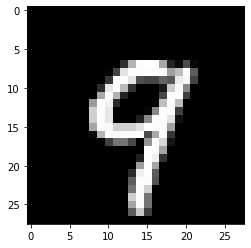

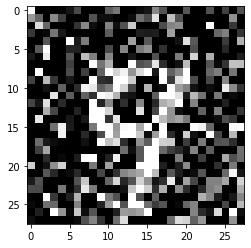

In [25]:
#print('networkoutput = ',networkoutput)
test_index = 12

test_img = np.zeros((20,28,28,1))

test_img[0] = x_test[test_index].reshape(1,28,28,1)
test_label = y_test[test_index].astype('int32')
print('test_label',test_label)
# add Noise

Noise_img = np.zeros((test_img.shape))
Noise_img = test_img + 0.5 * np.random.normal(size = (1,28,28,1))
Noise_img = np.clip(Noise_img,0,1)

print('test_img',test_img.shape)
print('Noise_img',Noise_img.shape)
plt.figure()
plt.imshow(test_img[0].reshape((28,28)),cmap = 'gray')
plt.figure()
plt.imshow(Noise_img[0].reshape((28,28)),cmap = 'gray')

conv1 (20, 24, 24, 32)
MP1 (20, 12, 12, 32)
conv2 (20, 10, 10, 32)
MP2 (20, 5, 5, 32)
Flat (20, 800)
fc1 (20, 128)
deltax:0
conv1/kernel:0
conv1/bias:0
conv2/kernel:0
conv2/bias:0
fc1/kernel:0
fc1/bias:0
out/kernel:0
out/bias:0
###############################
conv1/kernel:0
conv1/bias:0
conv2/kernel:0
conv2/bias:0
fc1/kernel:0
fc1/bias:0
out/kernel:0
out/bias:0
This is the train-graph name
###############################
INFO:tensorflow:Restoring parameters from /home/chaotang/文档/Try/2D/log/MydigitNet.ckpt
Model restored.
Noise_img (20, 28, 28, 1)
deltax=  (28, 28, 1)
3.0872745513916016


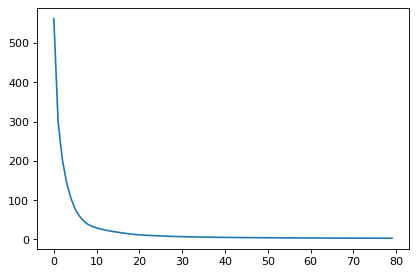

In [32]:
# restore the model
tf.reset_default_graph()
batchsize = 20
MODEL_PATH = os.path.join(LOG_DIR,'MydigitNet.ckpt')
###############################
### Have to redifine Graph ####
###############################
# this is the new graph
x_pl = tf.placeholder(tf.float32,shape = [batchsize,28,28,1],name = 'x_pl')
# x_pl = Noise_img
label_pl = tf.placeholder(tf.int32,shape = [batchsize],name = 'label_pl')

deltax = tf.get_variable('deltax',dtype=tf.float32,shape = x_pl.shape,initializer = tf.zeros_initializer)
# 必须要固定shape 才行，否则不允许如此设定变量

New_x = tf.clip_by_value((x_pl + deltax),0,1)# this may need a clip operation
#New_x = x_pl + deltax

loss,output = digitNet(New_x,label_pl)
pre_trained_list = []
var_list = []
#optimizer = tf.train.AdamOptimizer(0.005)##################################################
# define loss function (energy) 
    # E1 = deltaX^2
E1 = 0.0 * tf.reduce_sum(tf.square(deltax[0])) # this become a scalar/// the shape of deltax[0] = (28,28,1)
    # E2 = Si ^ 2
#E2 = keras.losses.binary_crossentropy(feature, output[0])
E2 = 0.5 * tf.reduce_sum(tf.square(feature - output[0]))
energy_total = E1 + E2
    # optimizer define
optimizer = tf.train.GradientDescentOptimizer(0.001)

#optimizer = tf.train.AdamOptimizer(0.005)
    # 训练条件配置
train_var = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES,scope = 'deltax:0')
train_op = optimizer.minimize(energy_total,var_list = train_var)
    
for var in tf.global_variables():
    print(var.name)
    var_list.append(var)
pre_trained_list = var_list[1:]
print('###############################')
for var in pre_trained_list:
    print(var.name)
print('This is the train-graph name')
print('###############################')

saver = tf.train.Saver(var_list=pre_trained_list)

##################################
####### Graph has been redefine###
#################################

displacement_mat = np.zeros((500,28,28,1)) # store the displacement for every 100 iteration
##############################################################
with tf.Session() as sess:
    #sess.run(tf.variables_initializer([deltax]))
    
    sess.run(tf.global_variables_initializer())
    
    saver.restore(sess,MODEL_PATH)
    print("Model restored.")
    #print('NoiseOutput',NoiseOutput[0])
    
    feed = {x_pl:Noise_img}
    print('Noise_img',Noise_img.shape)
    loss_mat = np.zeros((80,))
    for i in range(80):
        _,loss_in_loop = sess.run([train_op,energy_total],feed_dict = feed)
        #print('energy_total',loss_in_loop)
        loss_mat[i] = loss_in_loop
        #if i%1 ==0:
           # j = int(i/1)
            #displacement_mat[j,...] = deltax[0].eval()  
        
    print('deltax= ',deltax[0].eval().shape)
    displacement = deltax[0].eval()
    #print('displacement = ',displacement)
plt.plot(loss_mat)
print(np.amin(loss_mat))

In [33]:
tf.reset_default_graph()
MODEL_PATH = os.path.join(LOG_DIR,'MydigitNet.ckpt')
# Have to redifine Graph
x_pl = tf.placeholder(tf.float32,shape = [None,28,28,1],name = 'x_pl')
label_pl = tf.placeholder(tf.int32,shape = [None],name = 'label_pl')

loss,output = digitNet(x_pl,label_pl)

saver = tf.train.Saver()
with tf.Session() as sess: 
    saver.restore(sess, MODEL_PATH)
    print("Model restored.")
    # 设置输出小数点位数
    np.set_printoptions(precision=10)
    
    feed1 = {x_pl:test_img}
    output1 = sess.run(output,feed_dict =feed1)
    
    #Noise_img[:,16,9,:] +=1
    
    feed2 = {x_pl:Noise_img}
    output2 = sess.run(output,feed_dict =feed2)
    
    feed3 = {x_pl:Noise_img + displacement.reshape(1,28,28,1)}
    output3 = sess.run(output,feed_dict =feed3)
print('done with Network output')

conv1 (?, 24, 24, 32)
MP1 (?, 12, 12, 32)
conv2 (?, 10, 10, 32)
MP2 (?, 5, 5, 32)
Flat (?, 800)
fc1 (?, 128)
INFO:tensorflow:Restoring parameters from /home/chaotang/文档/Try/2D/log/MydigitNet.ckpt
Model restored.
done with Network output


Original score for testLabel=  23.673397
Original output =  [-12.09794 -17.6905  -19.6961  -15.38374  12.15418  -8.5428  -23.13609
  -2.6946   -5.00959  23.6734 ]
Noise score for testLabel=  1.1412829
Noise output =  [-5.40647 -5.46338 -3.05423 -6.432    8.20198  1.43827 -8.48928 -2.15862
 -4.55581  1.14128]
New score for testLabel=  23.719112
New output=  [-17.76782 -17.93807 -16.6445  -10.0926   10.06539  -6.34651 -30.93329
  -1.9145   -8.58299  23.71911]
different =  0.0074578220322843855


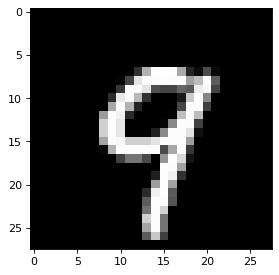

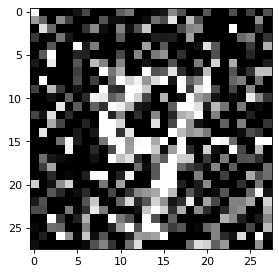

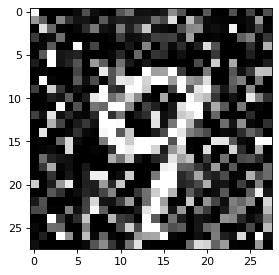

In [34]:
np.set_printoptions(precision=5)
plt.rcParams['figure.dpi'] = 80 #分辨率
plt.imshow(test_img[0].reshape((28,28)),cmap = 'gray')
print('Original score for testLabel= ',output1[0,test_label]) #test_label
print('Original output = ',output1[0,:]) #test_label

plt.figure()
Old_noise = np.clip(Noise_img[0],0,1).reshape((28,28))
plt.imshow(Old_noise,cmap = 'gray')
print('Noise score for testLabel= ',output2[0,test_label])
print('Noise output = ',output2[0,:]) #test_label

plt.figure()
# Change 
Processed = np.clip(Noise_img[0] + displacement,0,1).reshape((28,28))
plt.imshow(Processed,cmap = 'gray')
print('New score for testLabel= ',output3[0,test_label])
print('New output= ',output3[0,:])

print('different = ',  np.square(Processed-Old_noise).mean())

In [35]:
# The noise resistance ability of Neural Network